<a href="https://colab.research.google.com/github/MateusTG/MateusTG/blob/main/projeto_unidade_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import zipfile
import os

In [ ]:
uploaded = files.upload()


Definição e Preparação do Problema

In [5]:
X_test_path = "/content/UCI HAR Dataset/test/X_test.txt"
X_test = pd.read_csv(X_test_path, sep=",")
print("X Test:")
print(X_test.head())

X Test:
  2.5717778e-001 -2.3285230e-002 -1.4653762e-002 -9.3840400e-001 -9.2009078e-001 -6.6768331e-001 -9.5250112e-001 -9.2524867e-001 -6.7430222e-001 -8.9408755e-001 -5.5457721e-001 -4.6622295e-001  7.1720847e-001  6.3550240e-001  7.8949666e-001 -8.7776423e-001 -9.9776606e-001 -9.9841381e-001 -9.3434525e-001 -9.7566897e-001 -9.4982365e-001 -8.3047780e-001 -1.6808416e-001 -3.7899553e-001  2.4621698e-001  5.2120364e-001 -4.8779311e-001  4.8228047e-001 -4.5462113e-002  2.1195505e-001 -1.3489443e-001  1.3085848e-001 -1.4176313e-002 -1.0597085e-001  7.3544013e-002 -1.7151642e-001  4.0062978e-002  7.6988933e-002 -4.9054573e-001 -7.0900265e-001  9.3648925e-001 -2.8271916e-001  1.1528825e-001 -9.2542727e-001 -9.3701413e-001 -5.6428842e-001 -9.3001992e-001 -9.3782195e-001 -6.0558770e-001  9.0608259e-001 -2.7924413e-001  1.5289519e-001  9.4446140e-001 -2.6215956e-001 -7.6161676e-002 -1.7826920e-002  8.2929682e-001 -8.6462060e-001 -9.6779531e-001 -9.4972666e-001 -9.4611920e-001 -7.5971815e-001

In [22]:
Y_test_path = "/content/UCI HAR Dataset/test/y_test.txt"
Y_test = pd.read_csv(Y_test_path, sep=",")
print("Y Test:")
print(Y_test.head())

Y Test:
   5
0  5
1  5
2  5
3  5
4  5


In [8]:
X_train_path = "/content/UCI HAR Dataset/train/X_train.txt"
X_train = pd.read_csv(X_train_path, sep=",")
print("X Train:")
print(X_train.head())

X Train:
  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-00

In [9]:
Y_train_path = "/content/UCI HAR Dataset/train/y_train.txt"
Y_train = pd.read_csv(Y_train_path, sep=",")
print("Y Train:")
print(Y_train.head())

Y Train:
   5
0  5
1  5
2  5
3  5
4  5


Distribuições de Vairiáveis


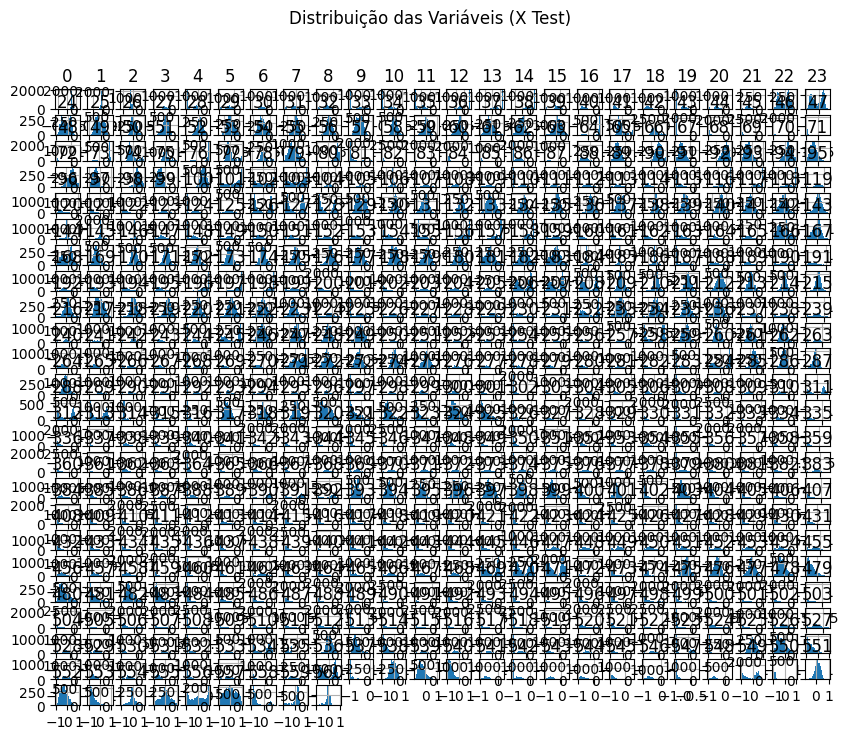

In [40]:
X_test_split = X_test.iloc[:, 0].str.split(expand=True).astype(float)
X_test_split.hist(bins=20, figsize=(10, 8))
plt.suptitle("Distribuição das Variáveis (X Test)")
plt.show()

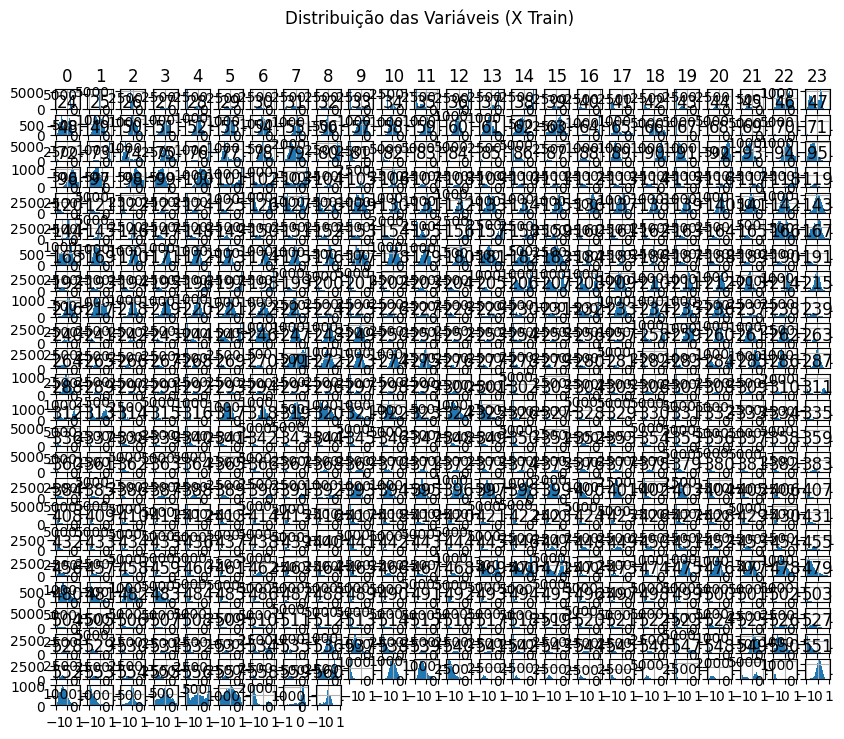

In [15]:
X_train_split = X_train.iloc[:, 0].str.split(expand=True).astype(float)
X_train_split.hist(bins=20, figsize=(10, 8))
plt.suptitle("Distribuição das Variáveis (X Train)")
plt.show()

Matriz de Correlação

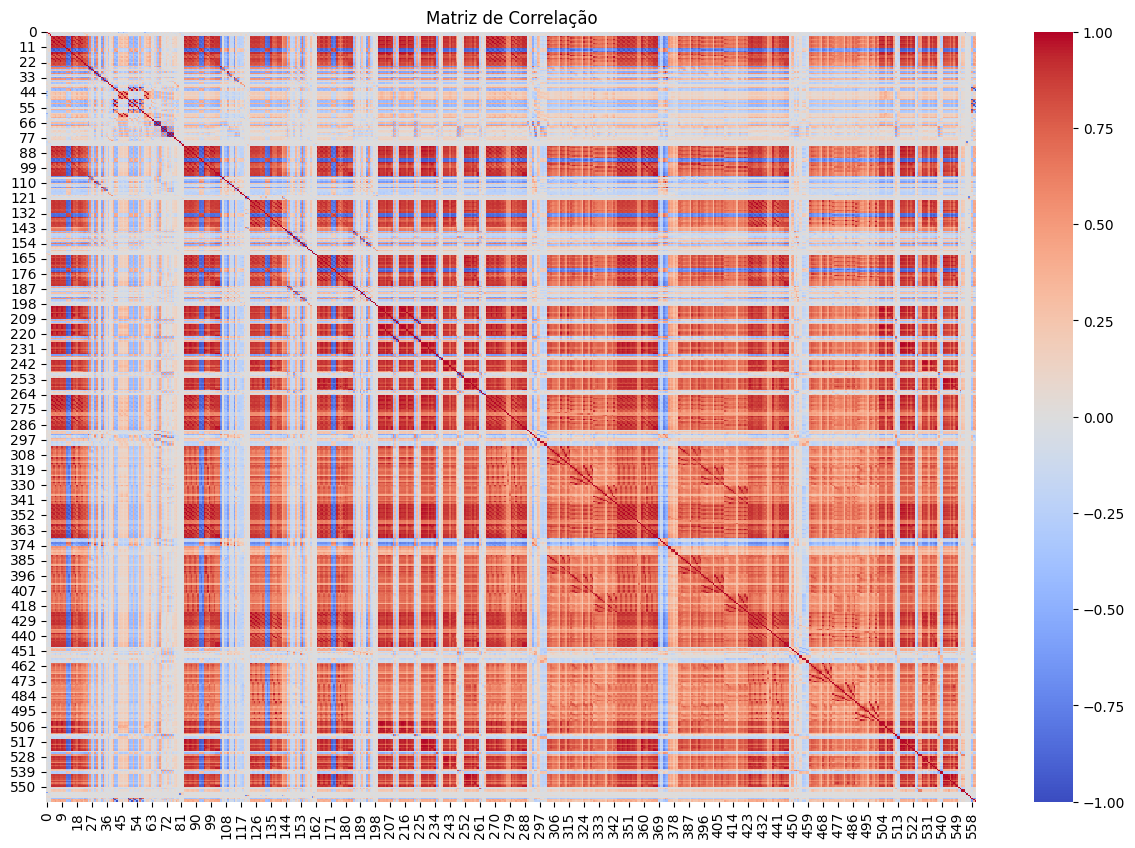

In [18]:
# Calcular matriz de correlação
corr_matrix = X_test_split.corr()

# Heatmap da correlação
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1, vmin=-1)
plt.title("Matriz de Correlação")
plt.show()

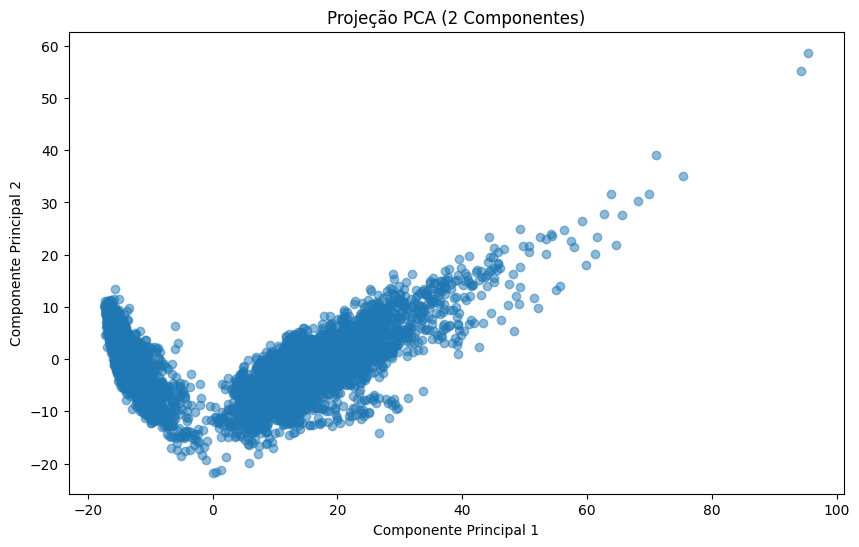

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_split)

# Aplicar PCA
pca = PCA(n_components=2)  # Usar 2 componentes principais para visualização
X_pca = pca.fit_transform(X_scaled)

# Visualizar os dois primeiros componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Projeção PCA (2 Componentes)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

Implementação do Algoritmo de K-means

Treinamento do K-Means

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Prever os clusters para cada amostra
clusters = kmeans.labels_

# Adicionar os clusters ao DataFrame para análise
clustered_data = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
clustered_data['Cluster'] = clusters

print("Clusters atribuídos:")
print(clustered_data.head())

Clusters atribuídos:
         PC1       PC2  Cluster
0 -15.298413  1.387882        0
1 -15.139188  2.474105        0
2 -15.353158  3.916612        0
3 -15.547036  4.598805        0
4 -15.361439  4.725530        0


Escolha do Número de Clusters (K)

Método do Cotovelo (Elbow Method)

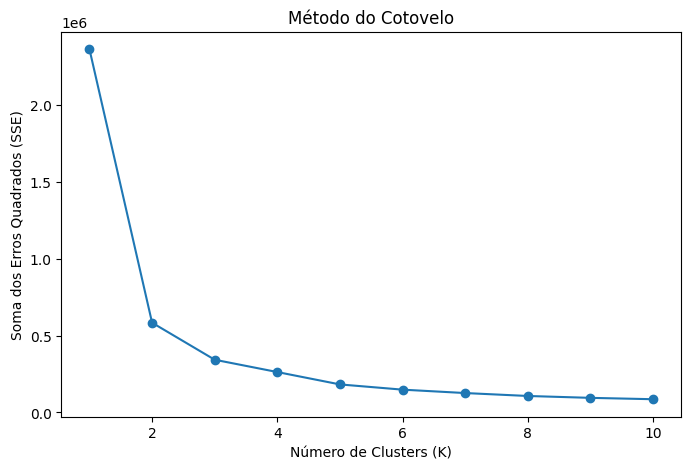

In [26]:
sse = []  # Lista para armazenar o SSE
k_range = range(1, 11)  # Testar K de 1 a 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Soma dos Erros Quadrados (SSE)")
plt.show()


Silhouette Score

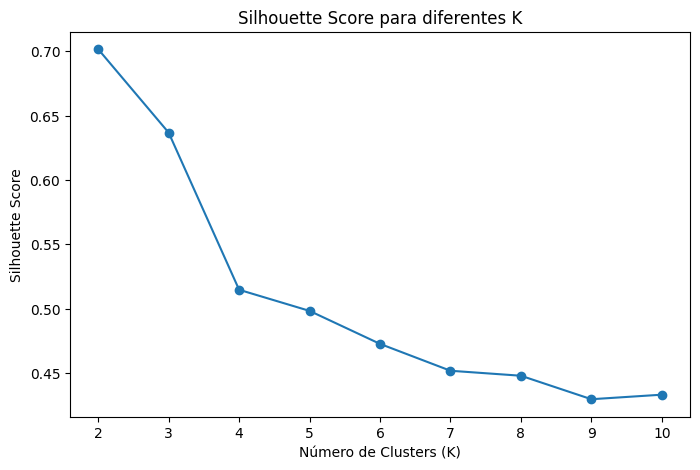

In [27]:
silhouette_scores = []  # Lista para armazenar os scores

for k in range(2, 11):  # Silhouette requer pelo menos 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Plotar os scores de silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score para diferentes K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


Escolha final do valor de K

In [28]:
ideal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 porque começa em 2
print(f"O número ideal de clusters é: {ideal_k}")

O número ideal de clusters é: 2


Visualização dos Clusters

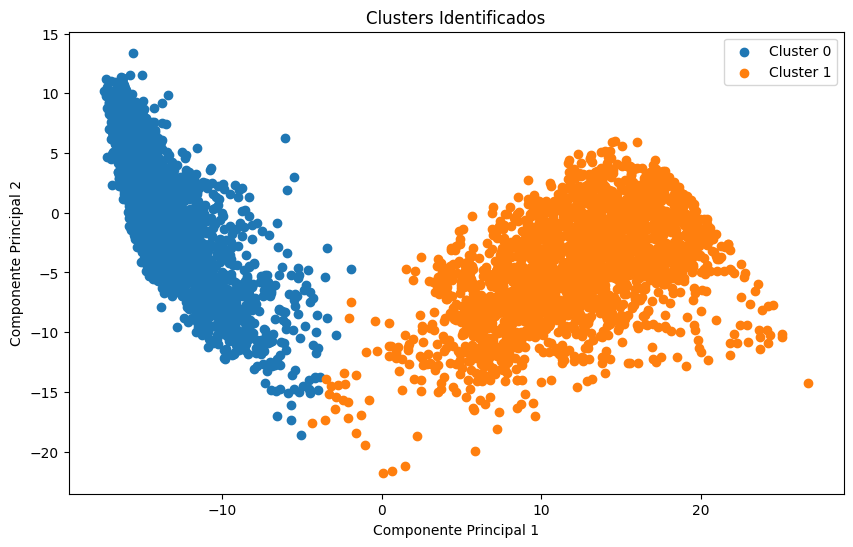

In [29]:
plt.figure(figsize=(10, 6))
for cluster in range(ideal_k):
    cluster_points = clustered_data[clustered_data['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f"Cluster {cluster}")

plt.title("Clusters Identificados")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

Inicialização e Convergência com K-means++

In [30]:
from sklearn.cluster import KMeans

# Treinamento do modelo com K-means++
kmeans = KMeans(n_clusters=ideal_k, init="k-means++", random_state=42)
kmeans.fit(X_pca)

# Exibir centróides resultantes
print("Centróides do K-means++:")
print(kmeans.cluster_centers_)

Centróides do K-means++:
[[-13.97761128   1.01557102]
 [ 17.24372585  -1.25287705]]


Normalização dos Dados

In [32]:
# Normalizar os dados para o intervalo [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_train_split)

# Aplicar PCA após a normalização (se necessário)
n_features = X_normalized.shape[1]  # Número de variáveis no dataset
pca = PCA(n_components=min(10, n_features))  # Não exceder o número de colunas

X_pca_normalized = pca.fit_transform(X_normalized)

print(f"Forma dos dados normalizados e reduzidos: {X_pca_normalized.shape}")

Forma dos dados normalizados e reduzidos: (7351, 10)


Repetições e Estabilidade

In [33]:
# Executar o K-means múltiplas vezes
kmeans_multiple = KMeans(n_clusters=ideal_k, init="k-means++", n_init=10, random_state=42)
kmeans_multiple.fit(X_pca)

# Verificar a inércia (soma das distâncias quadradas aos centróides) e os clusters
print("Inércia final após múltiplas inicializações:", kmeans_multiple.inertia_)

# Observar os clusters
clusters_multiple = kmeans_multiple.labels_
print("Clusters atribuídos:")
print(clusters_multiple[:10])  # Mostrar os primeiros 10 clusters

Inércia final após múltiplas inicializações: 584459.7853772313
Clusters atribuídos:
[0 0 0 0 0 0 0 0 0 0]


Visualizar Consistência

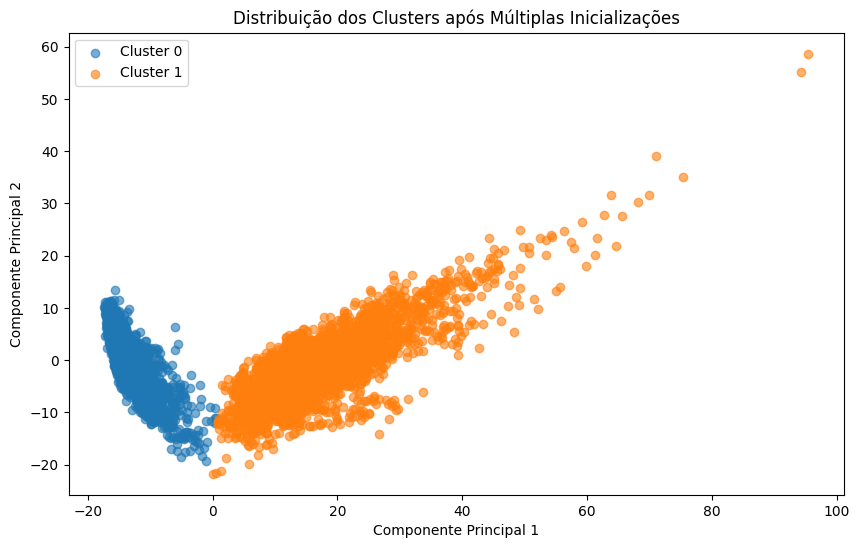

In [34]:
# Visualizar clusters com base nos dois primeiros componentes principais
plt.figure(figsize=(10, 6))
for cluster in range(ideal_k):
    cluster_points = X_pca[clusters_multiple == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Distribuição dos Clusters após Múltiplas Inicializações")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

Métricas de Avaliação

In [35]:
print(f"Inércia final do K-Means: {kmeans_multiple.inertia_}")

Inércia final do K-Means: 584459.7853772313


Silhouette Score

In [36]:
silhouette_avg = silhouette_score(X_pca, kmeans_multiple.labels_)
print(f"Silhouette Score médio: {silhouette_avg}")

Silhouette Score médio: 0.7015468706233647


Interpretação dos Clusters

Analisar as características de cada cluster

In [37]:
# Criar um DataFrame para análise dos clusters
cluster_analysis = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
cluster_analysis['Cluster'] = kmeans_multiple.labels_

# Exibir estatísticas descritivas por cluster
cluster_summary = cluster_analysis.groupby('Cluster').mean()
print("Resumo dos clusters:")
print(cluster_summary)

Resumo dos clusters:
               PC1       PC2
Cluster                     
0       -13.981071  1.021183
1        17.238507 -1.259108
